In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score , precision_score




In [2]:
data = pd.read_csv('data/creditcard2.csv' ) #读取数据
data.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.244964,0,-1.960264
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.342475,0,-1.960264
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,1.160686,0,-1.960264
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.140534,0,-1.960264
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.073403,0,-1.960264


In [3]:
features = list(data.columns)
features.remove('Class')

In [4]:
X = data[features]
y = data['Class']

In [5]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# Separate class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]# print the shape of the class
print('class 0 (Otherwise):', class_0.shape)
print('class 1 (Fraud):', class_1.shape)

class 0 (Otherwise): (284315, 19)
class 1 (Fraud): (492, 19)


In [6]:
# load library
from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(X, y)

print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 284315, 1: 492})
Resampple dataset shape: Counter({0: 284315, 1: 284315})


In [7]:
sm = SMOTE(random_state=42)    # 处理过采样的方法
X, y = sm.fit_resample(X, y)
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('samples: {}; Postive: {:.2%}; Negative: {:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))

samples: 568630; Postive: 50.00%; Negative: 50.00%


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter= 500, activation='logistic', solver='adam',random_state=42)

In [10]:
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', max_iter=500, random_state=42)

In [11]:

y_pred = clf.predict(X_test)

In [12]:
print('Accuracy of MLP Classifier on test set: {:.5f}'.format(clf.score(X_test, y_test)))

Accuracy of MLP Classifier on test set: 0.99947


In [28]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset: 1.00000


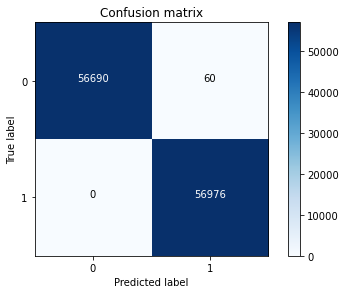

In [48]:
cnf_matrix = confusion_matrix(y_test, y_pred) 
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: %.5f" % (cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [46]:
print('Precision: %.5f' % precision_score(y_test, y_pred))


Precision: 0.99895
